<a href="https://colab.research.google.com/github/saamirkc/DeepLearning/blob/main/EarlyStopping.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import tensorflow as tf
import numpy as np
import pandas as pd
from pylab import rcParams
import matplotlib.pyplot as plt
import warnings
from mlxtend.plotting import plot_decision_regions
from matplotlib.colors import ListedColormap
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dropout
from tensorflow.keras.layers import Dense
from tensorflow.keras.callbacks import EarlyStopping
from sklearn.model_selection import train_test_split
from sklearn.datasets import make_circles
import seaborn as sns

In [2]:
X, y = make_circles(n_samples=100, noise=0.1, random_state=1)

In [3]:
X


array([[-0.63640493, -0.36870191],
       [-0.24465976, -0.73659196],
       [-0.46597138, -1.06687743],
       [-0.70999784, -0.40841948],
       [ 0.70232238, -0.51730147],
       [-0.49776571,  0.76955129],
       [-0.31914906, -0.84899624],
       [-0.57839322, -0.49081236],
       [-0.53350227,  0.58056527],
       [-0.24733259,  0.73011595],
       [ 0.41030774, -0.73075986],
       [ 0.17181003, -0.92504802],
       [ 0.65917045,  0.62120588],
       [ 0.87625577,  0.12510879],
       [ 0.81946243, -0.01347859],
       [-0.47960986, -0.7880243 ],
       [-0.90187751, -0.70895455],
       [ 0.74827659, -0.55976747],
       [-0.74875324, -0.37153443],
       [ 0.23161178,  1.01205842],
       [ 0.81387506,  0.22821311],
       [-0.92169575,  0.20310719],
       [ 0.74650434, -0.35861224],
       [ 0.01330079,  0.68169193],
       [-0.72651409,  0.58630948],
       [-0.33930852, -1.0080984 ],
       [ 0.49009938, -0.62509577],
       [-0.9539309 , -0.33410313],
       [ 0.6927241 ,

<Axes: >

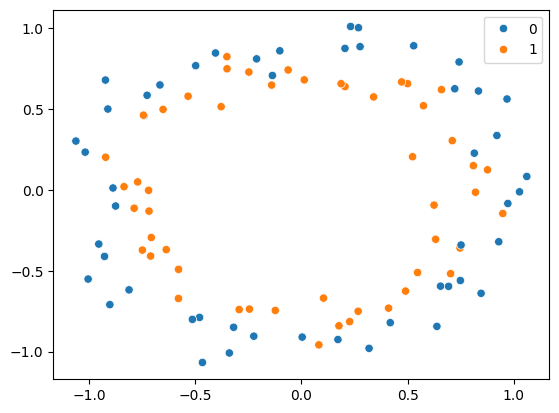

In [6]:
sns.scatterplot(x=X[:, 0], y=X[:, 1], hue=y)

In [7]:
X_train ,X_test,y_train,y_test = train_test_split(X,y,test_size=0.2,random_state=1)

In [8]:
model = Sequential()

model.add(Dense(256, input_dim=2, activation='relu'))
model.add(Dense(1, activation='sigmoid'))

In [9]:
model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])

In [11]:
callback = EarlyStopping(
    monitor="val_loss",
    min_delta=0.00001,
    patience=20,
    verbose=1,
    mode="auto",
    baseline=None,
    restore_best_weights=False
)

here if call back function is not used then it takes very much longer time to iterate over 3500 epochs.

In [12]:
history = model.fit(X_train, y_train, validation_data=(X_test, y_test), epochs=3500, callbacks=callback)

Epoch 1/3500
3/3 [==============================] - 0s 46ms/step - loss: 0.2047 - accuracy: 0.9250 - val_loss: 0.4512 - val_accuracy: 0.8500
Epoch 2/3500
3/3 [==============================] - 0s 55ms/step - loss: 0.2051 - accuracy: 0.9375 - val_loss: 0.4549 - val_accuracy: 0.8500
Epoch 3/3500
3/3 [==============================] - 0s 46ms/step - loss: 0.2049 - accuracy: 0.9375 - val_loss: 0.4534 - val_accuracy: 0.8500
Epoch 4/3500
3/3 [==============================] - 0s 56ms/step - loss: 0.2059 - accuracy: 0.9250 - val_loss: 0.4536 - val_accuracy: 0.8500
Epoch 5/3500
3/3 [==============================] - 0s 56ms/step - loss: 0.2053 - accuracy: 0.9250 - val_loss: 0.4576 - val_accuracy: 0.8500
Epoch 6/3500
3/3 [==============================] - 0s 58ms/step - loss: 0.2053 - accuracy: 0.9250 - val_loss: 0.4647 - val_accuracy: 0.8500
Epoch 7/3500
3/3 [==============================] - 0s 42ms/step - loss: 0.2050 - accuracy: 0.9125 - val_loss: 0.4679 - val_accuracy: 0.8500
Epoch 8/3500


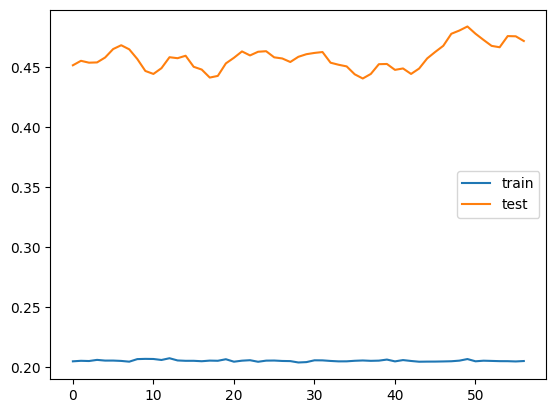

In [13]:
plt.plot(history.history['loss'], label='train')
plt.plot(history.history['val_loss'], label='test')
plt.legend()
plt.show()